# I. Algorithm

## 1. Mathematics
### Softmax function:
$$ a_i = \frac{\exp(z_i)}{\sum_{j=1}^C \exp(z_j)}, ~~ \forall i = 1, 2, \dots, C$$
Note:
- $z_i = \mathbf{w}_i^T\mathbf{x}$ 
- $P(y_k = i | \mathbf{x}_k; \mathbf{W}) = a_i$
- To avoid overflow we convert it to more stable function (usually $c = \max_i z_i$):
    $$\begin{eqnarray}
    \frac{\exp(z_i)}{\sum_{j=1}^C \exp(z_j)} &=& \frac{\exp(-c)\exp(z_i)}{\exp(-c)\sum_{j=1}^C \exp(z_j)}\\
    &=& \frac{\exp(z_i-c)}{\sum_{j=1}^C \exp(z_j-c)}
    \end{eqnarray}$$
![](softmax_ex.png)

### Loss function (Cross Entropy):
$$J(\mathbf{W};\mathbf{x}_i, \mathbf{y}_i) = -\sum_{j=1}^C y_{ji}\log(a_{ji})$$

### Derivative:
$$\begin{eqnarray}
J(\mathbf{W};\mathbf{x}_i, \mathbf{y}_i)  &=& -\sum_{j = 1}^C y_{ji}\log\left(\frac{\exp(\mathbf{w}_j^T\mathbf{x}_i)}{\sum_{k=1}^C \exp(\mathbf{w}_k^T\mathbf{x}_i)}\right) \\
&=& -\sum_{j=1}^C\left(y_{ji} \mathbf{w}_j^T\mathbf{x}_i - y_{ji}\log\left(\sum_{k=1}^C \exp(\mathbf{w}_k^T\mathbf{x}_i)\right)\right) \\
&=& -\sum_{j=1}^C y_{ji} \mathbf{w}_j^T\mathbf{x}_i + \log\left(\sum_{k=1}^C \exp(\mathbf{w}_k^T\mathbf{x}_i)\right) ~~ 
\end{eqnarray}$$
Apply:
$$\frac{\partial J_i(\mathbf{W})}{\partial \mathbf{W}} = \left[\frac{\partial J_i(\mathbf{W})}{\partial \mathbf{w}_1}, \frac{\partial J_i(\mathbf{W})}{\partial \mathbf{w}_2}, \dots, \frac{\partial J_i(\mathbf{W})}{\partial \mathbf{w}_C}    \right]$$
We have the derivative of each column:
$$\begin{eqnarray}
\frac{\partial J_i(\mathbf{W})}{\partial \mathbf{w}_j} &=& -y_{ji}\mathbf{x}_i + 
\frac{\exp(\mathbf{w}_j^T\mathbf{x}_i)}{\sum_{k = 1}^C \exp(\mathbf{w}_k^T\mathbf{x}_i)}\mathbf{x}_i \\
&=& -y_{ji}\mathbf{x}_i + a_{ji} \mathbf{x}_i = \mathbf{x}_i (a_{ji} - y_{ji}) \\
&=& e_{ji}\mathbf{x}_{i} ~(\text{where}~ e_{ji} = a_{ji} - y_{ji})
\end{eqnarray}$$
Which means:
$$\frac{\partial J_i(\mathbf{W})}{\partial \mathbf{W}} = \mathbf{x}_i [e_{1i}, e_{2i}, \dots, e_{Ci}] = \mathbf{x}_i\mathbf{e}_i^T$$
$$\frac{\partial J(\mathbf{W})}{\partial \mathbf{W}} = \sum_{i=1}^N \mathbf{x}_i\mathbf{e}_i^T = \mathbf{X}\mathbf{E}^T$$
The theta will updated by:
$$\mathbf{W} = \mathbf{W} +\eta \mathbf{x}_{i}(\mathbf{y}_i - \mathbf{a}_i)^T$$

### 2. Code
- Step 1: Create a function to calculate softmax.
- Step 2: Create a function to calculate derivative.
- Step 3: Calculate theta.
- Step 4: Predict new data.

In [62]:
import numpy as np

class SoftmaxRegression(object):
    def __init__(self):
        self.X_train = np.array([])
        self.y_train = np.array([])
        self.converted_y_train = np.array([])
        self.X_predict = np.array([])
        self.y_predict = np.array([])
        self.theta = np.array([])
        self.C = 0
        self.iteration = 0
        self.eta = 0

    def fit(self, X_train, y_train, iteration =2000, eta=0.05):
        self.X_train = X_train
        self.y_train = y_train
        self.C = np.unique(y_train).shape[0]
        self.iteration = iteration
        self.eta = eta
        
    # Step 1: Create function to calculate softmax     
    def softmax_stable(self, Z):
        e_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        A = e_Z/e_Z.sum(axis=1,keepdims=True)
        return A

    # Step 2: Create function to calculate derivative     
    def softmax_grad(self, X_bar, theta):
        N = X_bar.shape[0]
        A = self.softmax_stable(X_bar.dot(theta))
        A[range(N), self.y_train] -= 1
        return X_bar.T.dot(A)/X_bar.shape[0]

    # Step 3: Calculate theta
    def calculate_theta(self):
        X_bar = np.concatenate((np.ones((self.X_train.shape[0], 1)), self.X_train), axis=1)
        self.theta = np.zeros((X_bar.shape[1],self.C))
        for i in range(self.iteration):
            self.theta -= self.eta*self.softmax_grad(X_bar, self.theta)

    # Step 4: Predict new data
    def predict(self, X_predict):
        self.X_predict = X_predict
        self.calculate_theta()
        X_bar_predict = np.concatenate((np.ones((self.X_predict.shape[0], 1)), self.X_predict), axis=1)
        self.y_predict = np.argmax(X_bar_predict.dot(self.theta), axis=1)
        return self.y_predict

# II. Practice

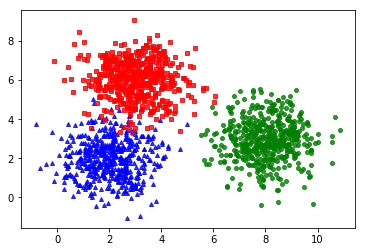

In [69]:
# Create data
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X_train = np.concatenate((X0, X1, X2), axis = 0)
y_train = np.asarray([0]*N + [1]*N + [2]*N).T
# Plot data
import matplotlib.pyplot as plt
def display(X, label):
    X0 = X[label == 0]
    X1 = X[label == 1]
    X2 = X[label == 2]
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)
    plt.plot()
    plt.show() 
display(X_train, y_train)

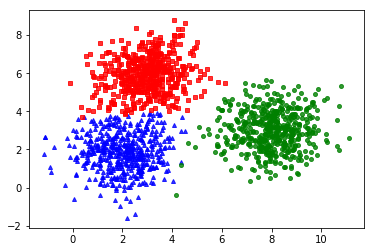

In [67]:
# Create model
model = SoftmaxRegression()
model.fit(X_train,y_train)
y_pre = model.predict(X_train)
# Plot model
display(X_train, y_pre)

# III. References:

Machine Learning cơ bản - Bài 13: Softmax Regression[https://machinelearningcoban.com/2017/02/17/softmax/]